In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
dataset = pd.read_csv('train.csv')

TEXT PREPROCESSING
- Stopword removal
- Lowercasing
- Tokenization

In [19]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself",
             "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
             "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing",
             "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", 
             "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
             "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


def text_preprocessing(text):
    lowercasing_text = text.lower()          
    tokenization = lowercasing_text.split()  
    tokenization =[word for word in tokenization if word not in stopwords]
    return ' '.join(tokenization)

#Apply changes
dataset['processed_dataset'] = dataset['text'].apply(text_preprocessing)

FEATURE EXTRACTION
-> TF-IDF

In [20]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(dataset['processed_dataset'])

MODEL SELECTION / TRAINING THE MODEL

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, dataset['intent'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
model = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   6.4s
[CV] END ...............................C=0.1, kernel=linear; total time=   6.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   7.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   7.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   8.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=  12.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.5s
[CV] END ..................................C=0.1, kernel=rbf; total time=   9.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.3s
[CV] END .................................C=1, kernel=linear; total time=   3.4s
[CV] END .................................C=1, ke

In [22]:
print("Model's Accuracy: ", accuracy_score(y_test, y_pred))
print("Model's Classification Report: \n ", classification_report(y_test, y_pred))
print("Model's Confusion Matrix: \n ", confusion_matrix(y_test, y_pred))

Model's Accuracy:  0.9783715012722646
Model's Classification Report: 
                        precision    recall  f1-score   support

       AddToPlaylist       1.00      0.99      1.00       107
      BookRestaurant       0.99      1.00      1.00       100
          GetWeather       1.00      1.00      1.00       115
           PlayMusic       0.95      0.99      0.97       108
            RateBook       0.98      1.00      0.99       108
  SearchCreativeWork       0.94      0.94      0.94       122
SearchScreeningEvent       0.99      0.94      0.96       126

            accuracy                           0.98       786
           macro avg       0.98      0.98      0.98       786
        weighted avg       0.98      0.98      0.98       786

Model's Confusion Matrix: 
  [[106   0   0   1   0   0   0]
 [  0 100   0   0   0   0   0]
 [  0   0 115   0   0   0   0]
 [  0   1   0 107   0   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   5   1 115   1]
 [  0   0   0   0   1   7 11

Accuracy:  0.9783715012722646


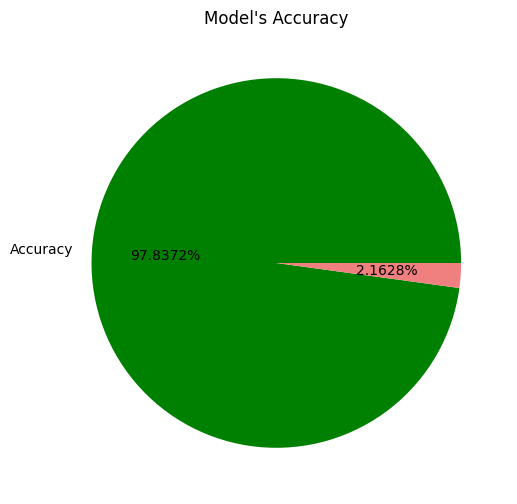

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)

#Model evaluation
print("Accuracy: ", accuracy_score)

#Calculate the complement for the second slice
complement_accuracy = 1 - accuracy_score

#Values for the pie chart slices
values = [accuracy_score, complement_accuracy]

#Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=['Accuracy', ""], colors = ['green', 'lightcoral'], autopct='%1.4f%%')
plt.title("Model's Accuracy")
plt.show()

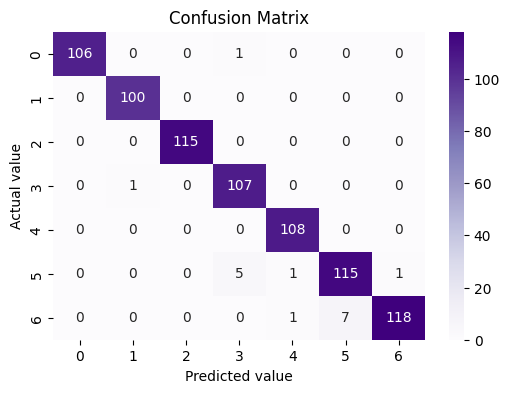

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13216\2869847683.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  prec = sns.barplot(x=classification_report_df.index, y=classification_report_df['precision'], palette='inferno', saturation=1)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this w

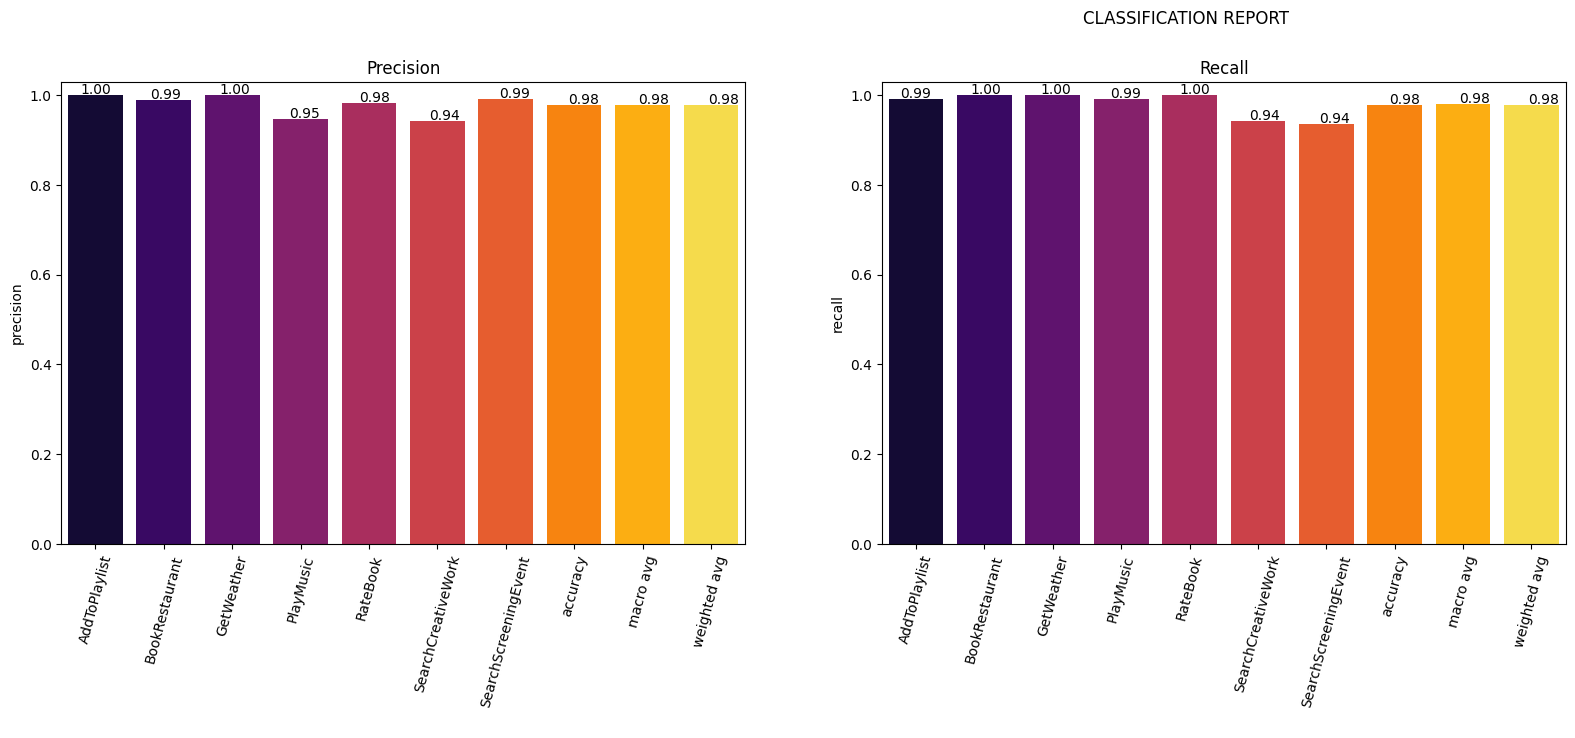

In [25]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred, output_dict=True)

#Converted to a DataFrame for easier manipulation and visualization.
classification_report_df = pd.DataFrame(classification_report).transpose()

#Plotting
plt.figure(figsize=(30, 6))
plt.suptitle("CLASSIFICATION REPORT", y=1)

#Precision plot
plt.subplot(1, 3, 1)

#The barplot created for precision was assigned to a variable
prec = sns.barplot(x=classification_report_df.index, y=classification_report_df['precision'], palette='inferno', saturation=1)

#With the loop, the values of all columns are displayed, not just one column
for p in prec.patches:
    prec.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', textcoords='offset points')
    
plt.title('Precision')
plt.xlabel(" ")
plt.ylim(0, 1.03)
plt.xticks(rotation=75)



#Recall plot
plt.subplot(1, 3, 2)

#The barplot created for Recall was assigned to a variable
recall = sns.barplot(x=classification_report_df.index, y=classification_report_df['recall'], palette='inferno', saturation=1) 

#With the loop, the values of all columns are displayed, not just one column
for r in recall.patches:       
    recall.annotate(f'{r.get_height():.2f}', (r.get_x() + r.get_width()/2., r.get_height()), 
                ha='center', textcoords='offset points')
    
plt.title('Recall')
plt.xlabel("")
plt.ylim(0, 1.03)
plt.xticks(rotation=75)

plt.show()

USER INPUT

In [26]:
user_input = input("Enter a text: ")
processed_input = text_preprocessing(user_input)
vector_input = tfidf_vectorizer.transform([processed_input])
prediction = model.predict(vector_input)

print("Input: " , user_input , "\n")
print("Intent: " , prediction)

Input:   

Intent:  ['GetWeather']
